# jet systematics

Given the analysis requires at least two jets and is binned in the number of b tags, the effect of uncertainties of the jets on the branching fractions should be considered.  The main sources to consider are:

   * jet energy scale
   * jet energy resolution
   * b tag efficiency scale factor
   * mistag efficiency scale factors
   
The first two uncertainty sources affect the overall number of events that are accepted, whereas all of these will cause migration between b tag multiplicity bins.  This is obviously the case for the efficiency scale factors; the jet energy uncertainty impacts the b tag multiplicity due to the pt dependence of the scale factors.

In [1]:
# imports and configuration
%cd /home/naodell/work/wbr/analysis

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('default')

import scripts.plot_tools as pt
import scripts.systematic_tools as st
from scripts.blt_reader import jec_source_names

pt.set_default_style()

/home/naodell/work/wbr/analysis
Welcome to JupyROOT 6.13/02


In [2]:
# Get the data (unbinned)
### get the data and prepare labels

selection = 'mumu'
dm = pt.DataManager(input_dir     = f'local_data/flatuples/test_jes/{selection}_2016',
                    dataset_names = ['ttbar_inclusive'],
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = pt.cuts[selection]
                   )

df = dm.get_dataframe('ttbar')

Loading dataframes: 100%|███████████████| 1.00/1.00 [00:17<00:00, 17.6s/it]


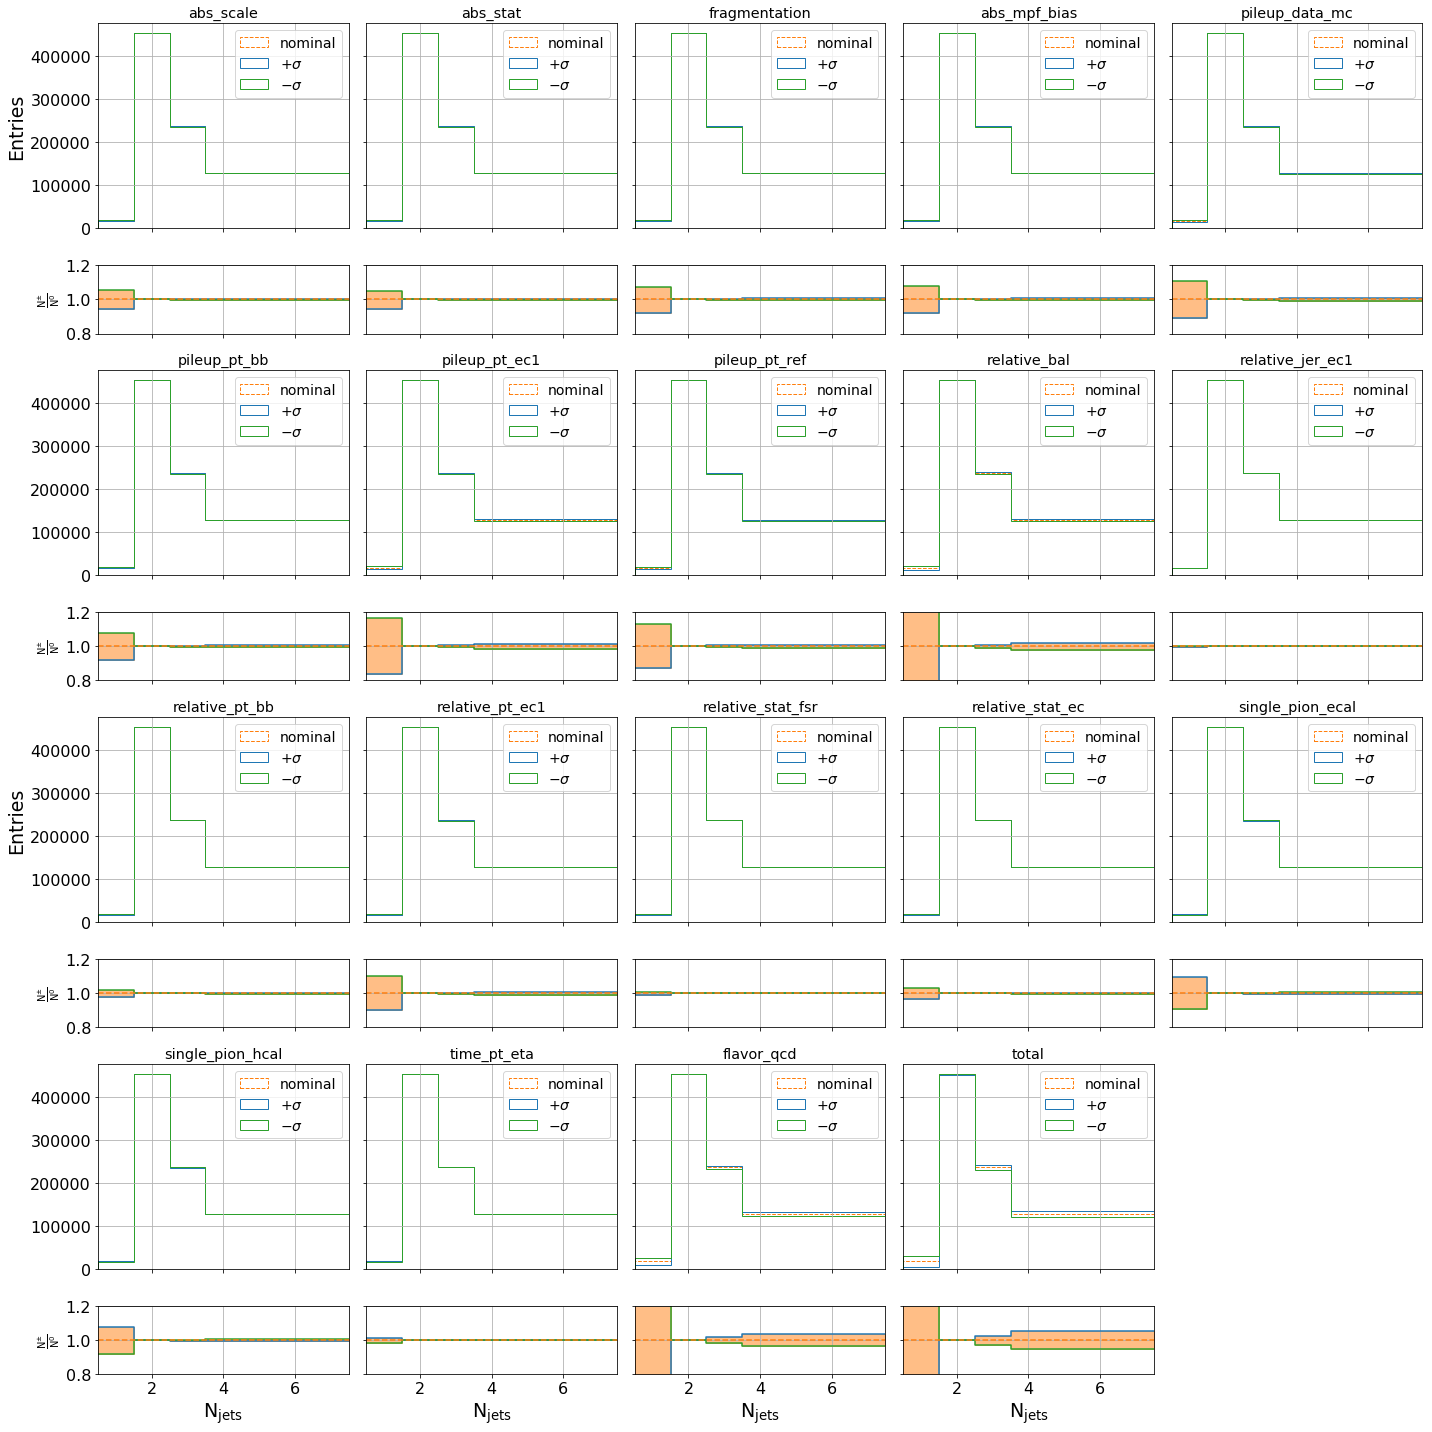

In [ ]:
# make plots of the jet multiplicity for JES 
fig, axes = plt.subplots(8, 5, figsize=(20, 20), facecolor='white', sharey='row', sharex='col', gridspec_kw={'height_ratios':4*[3,1,]})
#fig.subplots_adjust(top=0.9)
#fig.suptitle(f'{selection}')

if selection in ['ee', 'emu', 'mumu']:
    bins = [0.5, 1.5, 2.5, 3.5, 7.5]
elif selection in ['etau', 'mutau']:
    bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 7.5]
elif selection in ['e4j', 'mu4j']:
    bins = [2.5, 3.5, 4.5, 5.5, 7.5]
brange = (bins[0], bins[-1])

for ix, name in enumerate(jec_source_names):
    ax = axes[2*(ix//5), ix%5]
    h_nominal, b, _ = ax.hist(df.n_jets, bins=bins, color='C1', linestyle='--', histtype='step')
    h_plus, _, _ = ax.hist(df[f'n_jets_jes_{name}_up'], bins=bins, color='C0', histtype='step')
    h_minus, _, _ = ax.hist(df[f'n_jets_jes_{name}_down'], bins=bins, color='C2', histtype='step')
    #ax.fill_between(bins, h_plus[-1], h_minus[-1], color = 'C1', alpha=0.5, step='post')
    ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
    ax.set_title(name)
    ax.set_yscale('linear')
    ax.set_xlim(brange)
    ax.grid()
    
    if ix%10 == 0:
        ax.set_ylabel('Entries')

    ax = axes[2*(ix//5)+1, ix%5]
    x = bins
    y_up = h_plus/h_nominal
    y_down = h_minus/h_nominal
    y_up = np.append(y_up, y_up[-1])
    y_down = np.append(y_down, y_down[-1])
    ax.plot(x, y_up, 'C0', drawstyle='steps-post')
    ax.plot(x, y_down, 'C2', drawstyle='steps-post')
    ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
    ax.plot(brange, [1, 1], 'C1--')
    ax.set_ylim(0.8, 1.2)
    ax.grid()
    
    if ix//5 == 3:
        ax.set_xlabel(r'$\sf N_{jets}$')
        
    if ix%5 == 0:
        ax.set_ylabel(r'$\sf \frac{N^{\pm}}{N^{0}}$', fontsize=14)
    
# blank out last plot
axes[-2][-1].axis('off')
axes[-1][-1].axis('off')

plt.tight_layout()
plt.savefig(f'plots/systematics/{selection}_njets_jes.pdf')
plt.show()

In [ ]:
# make plots of the jet multiplicity for JES 
fig, axes = plt.subplots(8, 5, figsize=(20, 20), facecolor='white', sharey='row', sharex='col', gridspec_kw={'height_ratios':4*[3,1,]})
#fig.subplots_adjust(top=0.9)
#fig.suptitle(f'{selection}')

if selection in ['ee', 'emu', 'mumu']:
    bins = [-0.5, 0.5, 1.5, 7.5]
elif selection in ['etau', 'mutau']:
    bins = [-0.5, 0.5, 1.5, 7.5]
elif selection in ['e4j', 'mu4j']:
    bins = [1.5, 2.5, 7.5]
brange = (bins[0], bins[-1])

for ix, name in enumerate(jec_source_names):
    ax = axes[2*(ix//5), ix%5]
    h_nominal, b, _ = ax.hist(df.n_bjets, bins=bins, color='C1', linestyle='--', histtype='step')
    h_plus, _, _ = ax.hist(df[f'n_bjets_jes_{name}_up'], bins=bins, color='C0', histtype='step')
    h_minus, _, _ = ax.hist(df[f'n_bjets_jes_{name}_down'], bins=bins, color='C2', histtype='step')
    #ax.fill_between(bins, h_plus[-1], h_minus[-1], color = 'C1', alpha=0.5, step='post')
    ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
    ax.set_title(name)
    ax.set_yscale('linear')
    ax.set_xlim(brange)
    ax.grid()
    
    if ix%10 == 0:
        ax.set_ylabel('Entries')

    ax = axes[2*(ix//5)+1, ix%5]
    x = bins
    y_up = h_plus/h_nominal
    y_down = h_minus/h_nominal
    y_up = np.append(y_up, y_up[-1])
    y_down = np.append(y_down, y_down[-1])
    ax.plot(x, y_up, 'C0', drawstyle='steps-post')
    ax.plot(x, y_down, 'C2', drawstyle='steps-post')
    ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
    ax.plot(brange, [1, 1], 'C1--')
    #ax.set_ylim(0.9, 1.1)
    ax.grid()
    
    if ix%5 == 0:
        ax.set_ylabel(r'$\sf \frac{N^{\pm}}{N^{0}}$', fontsize=14)
        
    if ix//5 == 3:
        ax.set_xlabel(r'$\sf N_{b jets}$')

    
# blank out last plot
axes[-2][-1].axis('off')
axes[-1][-1].axis('off')

plt.tight_layout()
plt.savefig(f'plots/systematics/{selection}_nbjets_jes.pdf')
plt.show()